Largest Companies in the World

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import folium as fl
import missingno as msno
import autoreload
import json
import csv
import os
import sys

from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("darkgrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [2]:
df = pd.read_excel(r"D:\Open Classroom\Datasets\Largest Companies in the World\Largest Companies in the World.xlsx")
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
Global Rank                1924 non-null int64
Company                    1924 non-null object
Sales ($billion)           1924 non-null float64
Profits ($billion)         1924 non-null float64
Assets ($billion)          1924 non-null float64
Market Value ($billion)    1924 non-null float64
Country                    1924 non-null object
Continent                  1924 non-null object
Latitude                   1924 non-null float64
Longitude                  1924 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [4]:
df.shape

(1924, 10)

In [5]:
round(df.describe())

,Global Rank,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Latitude,Longitude
count,1924.0,1924.0,1924.0,1924.0,1924.0,1924.0,1924.0
mean,997.0,19.0,1.0,80.0,20.0,35.0,15.0
std,576.0,35.0,3.0,261.0,33.0,18.0,93.0
min,1.0,0.0,-24.0,1.0,0.0,-41.0,-106.0
25%,501.0,4.0,0.0,10.0,5.0,36.0,-96.0
50%,998.0,9.0,1.0,19.0,10.0,37.0,10.0
75%,1494.0,18.0,1.0,46.0,19.0,40.0,105.0
max,1999.0,469.0,45.0,3226.0,417.0,62.0,175.0


In [6]:
df.isnull().sum()

Global Rank                0
Company                    0
Sales ($billion)           0
Profits ($billion)         0
Assets ($billion)          0
Market Value ($billion)    0
Country                    0
Continent                  0
Latitude                   0
Longitude                  0
dtype: int64

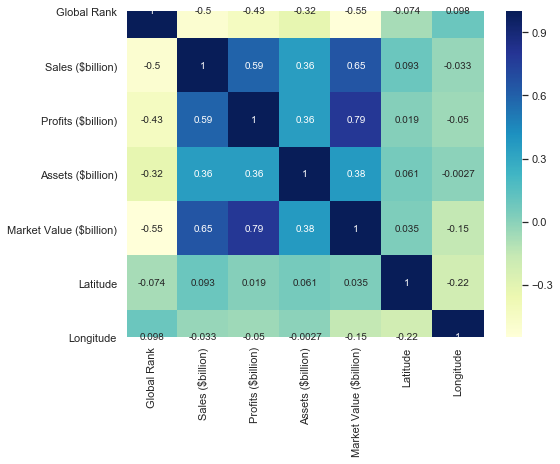

In [7]:
plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

In [8]:
df.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


Company Sales

Text(0.5, 1.0, 'Top 20 Companies with highest Sales \nof over 100 Billion Dollars ($)')

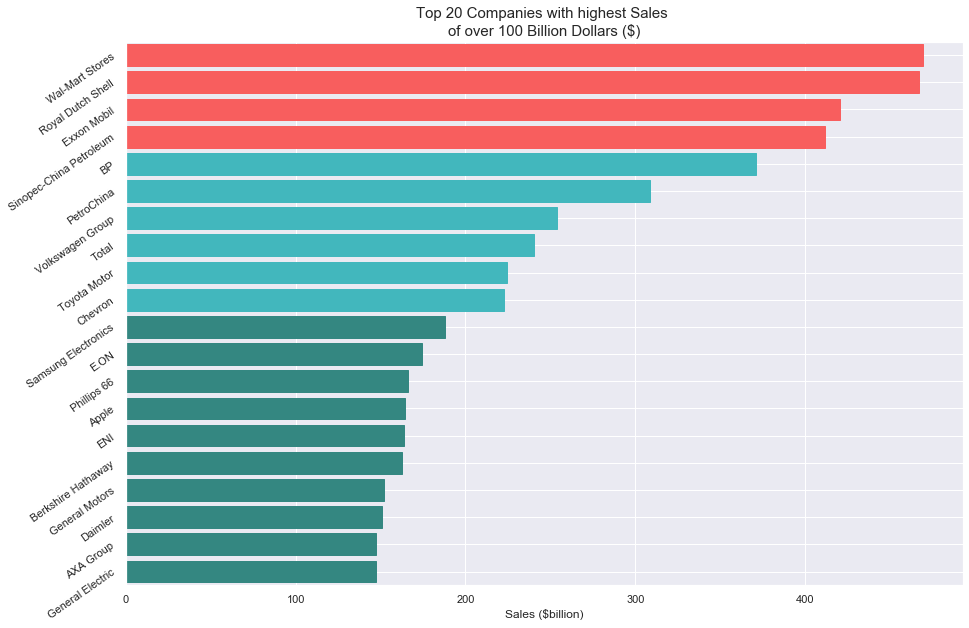

In [9]:
sales_per_company = df.groupby("Company").agg({"Sales ($billion)":"max"}).sort_values(by = "Sales ($billion)", ascending = False)
filt_sales_per_company = sales_per_company > (sales_per_company.mean())
sales_plot = sales_per_company[filt_sales_per_company].head(20)
plt.figure(figsize = (15, 10))
bar = sb.barplot(y = sales_plot.index, x = sales_plot["Sales ($billion)"])
for i in bar.patches:
    if i.get_width() > 400:
        i.set_color("#f85e5e")
    elif i.get_width() > 200:
        i.set_color("#42b7bd")
    else:
        i.set_color("#348781")
plt.yticks(rotation = 35)
plt.ylabel(None)
plt.grid(b = "both")
plt.title("Top 20 Companies with highest Sales \nof over 100 Billion Dollars ($)", fontsize = 15)

In [10]:
df["Continent"].value_counts()

Asia             719
North America    629
Europe           459
South America     49
Oceania           43
Africa            25
Name: Continent, dtype: int64

#### Company Profits

Text(0.5, 1.0, 'Top 20 Companies with highest Profit \nof over 10 Billion Dollars ($)')

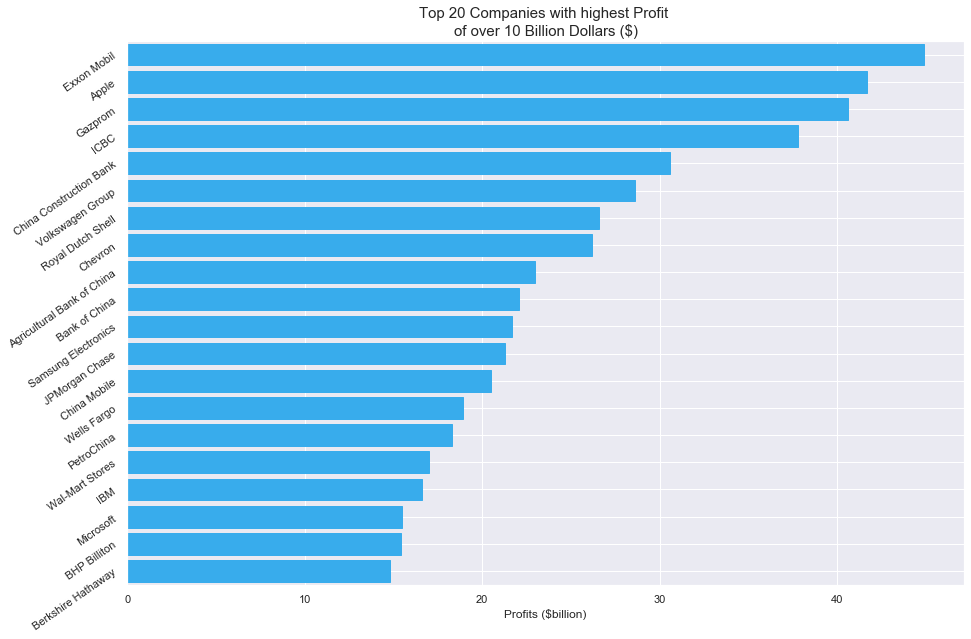

In [11]:
profit_per_company = df.groupby("Company").agg({"Profits ($billion)":"max"}).sort_values(by = "Profits ($billion)", ascending = False)
filt_profit_per_company = profit_per_company > (profit_per_company.mean())
profit_plot = profit_per_company[filt_profit_per_company].head(20)
plt.figure(figsize = (15, 10))
bar = sb.barplot(y = profit_plot.index, x = profit_plot["Profits ($billion)"])
for i in bar.patches:
    i.set_color("#38ACEC")
plt.yticks(rotation = 35)
plt.ylabel(None)
plt.grid(b = "both")
plt.title("Top 20 Companies with highest Profit \nof over 10 Billion Dollars ($)", fontsize = 15)

Text(0.5, 1.0, 'Top 20 Companies with highest Asset \nof over 500 Billion Dollars ($)')

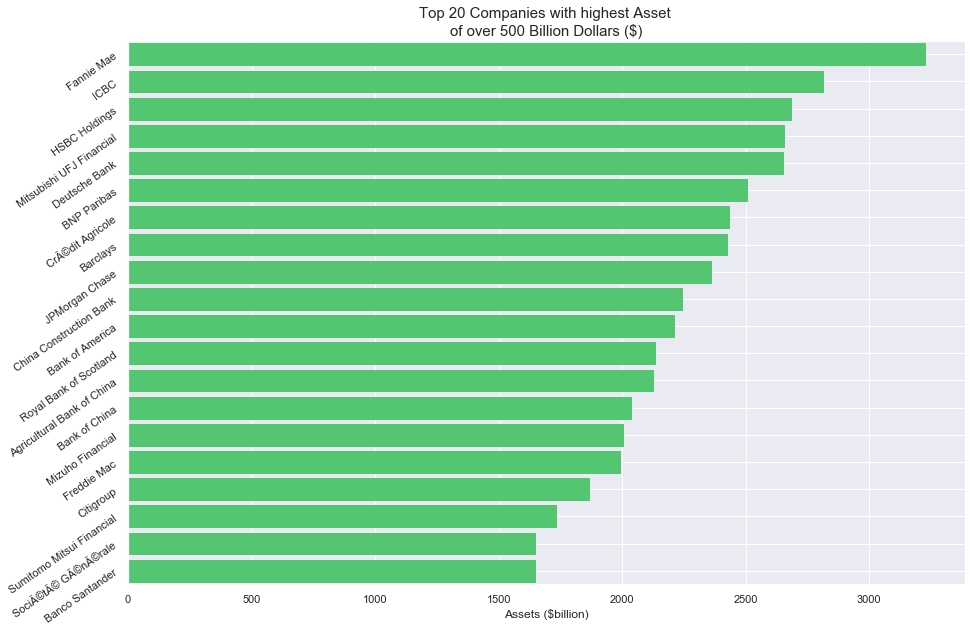

In [12]:
asset_per_company = df.groupby("Company").agg({"Assets ($billion)":"max"}).sort_values(by = "Assets ($billion)", ascending = False)
filt_asset_per_company = asset_per_company > (asset_per_company.mean())
asset_plot = asset_per_company[filt_asset_per_company].head(20)
plt.figure(figsize = (15, 10))
bar = sb.barplot(y = asset_plot.index, x = asset_plot["Assets ($billion)"])
for i in bar.patches:
    i.set_color("#54C571")
plt.yticks(rotation = 35)
plt.ylabel(None)
plt.grid(b = "both")
plt.title("Top 20 Companies with highest Asset \nof over 500 Billion Dollars ($)", fontsize = 15)

#### Map Plotting Locations for the Largest Companies in the world 

In [18]:
import folium

mean_latitude = df["Latitude"].mean()
mean_longitude = df["Longitude"].mean()

map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=2)

# add markers for each company location
for index, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Company"],
    ).add_to(map)
map

In [14]:
sales_per_company = df.groupby("Company").agg({"Sales ($billion)":"max"}).sort_values(by = "Sales ($billion)", ascending = False)
filt = df["Company"] == "Facebook"
df[filt]

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
1032,1071,Facebook,5.1,0.1,15.1,63.5,USA,North America,37.09024,-95.712891
